# MESA V Section 3: Energy Conservation 

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import mkipp                           # Available at https://github.com/orlox/mkipp
import mesa_reader as mr               # Available at http://wmwolf.github.io/MESA_Reader/

plt.style.use('/Users/mcantiello/.matplotlib/mesa.mplstyle')

# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)

## Two Panels Figure for MESA V

In [13]:
# Load Model with Gold Tolerances and dedt-form of energy equation
dir1='/Users/mcantiello/astro/work/mesa5/1Msun_heflash/LOGS'
# Load Model without Gold Tolerances and with dldm-form of energy equation
dir2='/Users/mcantiello/astro/work/mesa5/1Msun_heflash_no_gold_no_dedt/LOGS'

Reading profile data
Reading history data
Constructing mixing regions
there are 20 mixing zones


/Users/mcantiello/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


Reading profile data
Reading history data
Constructing mixing regions
there are 20 mixing zones


/Users/mcantiello/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
/Users/mcantiello/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


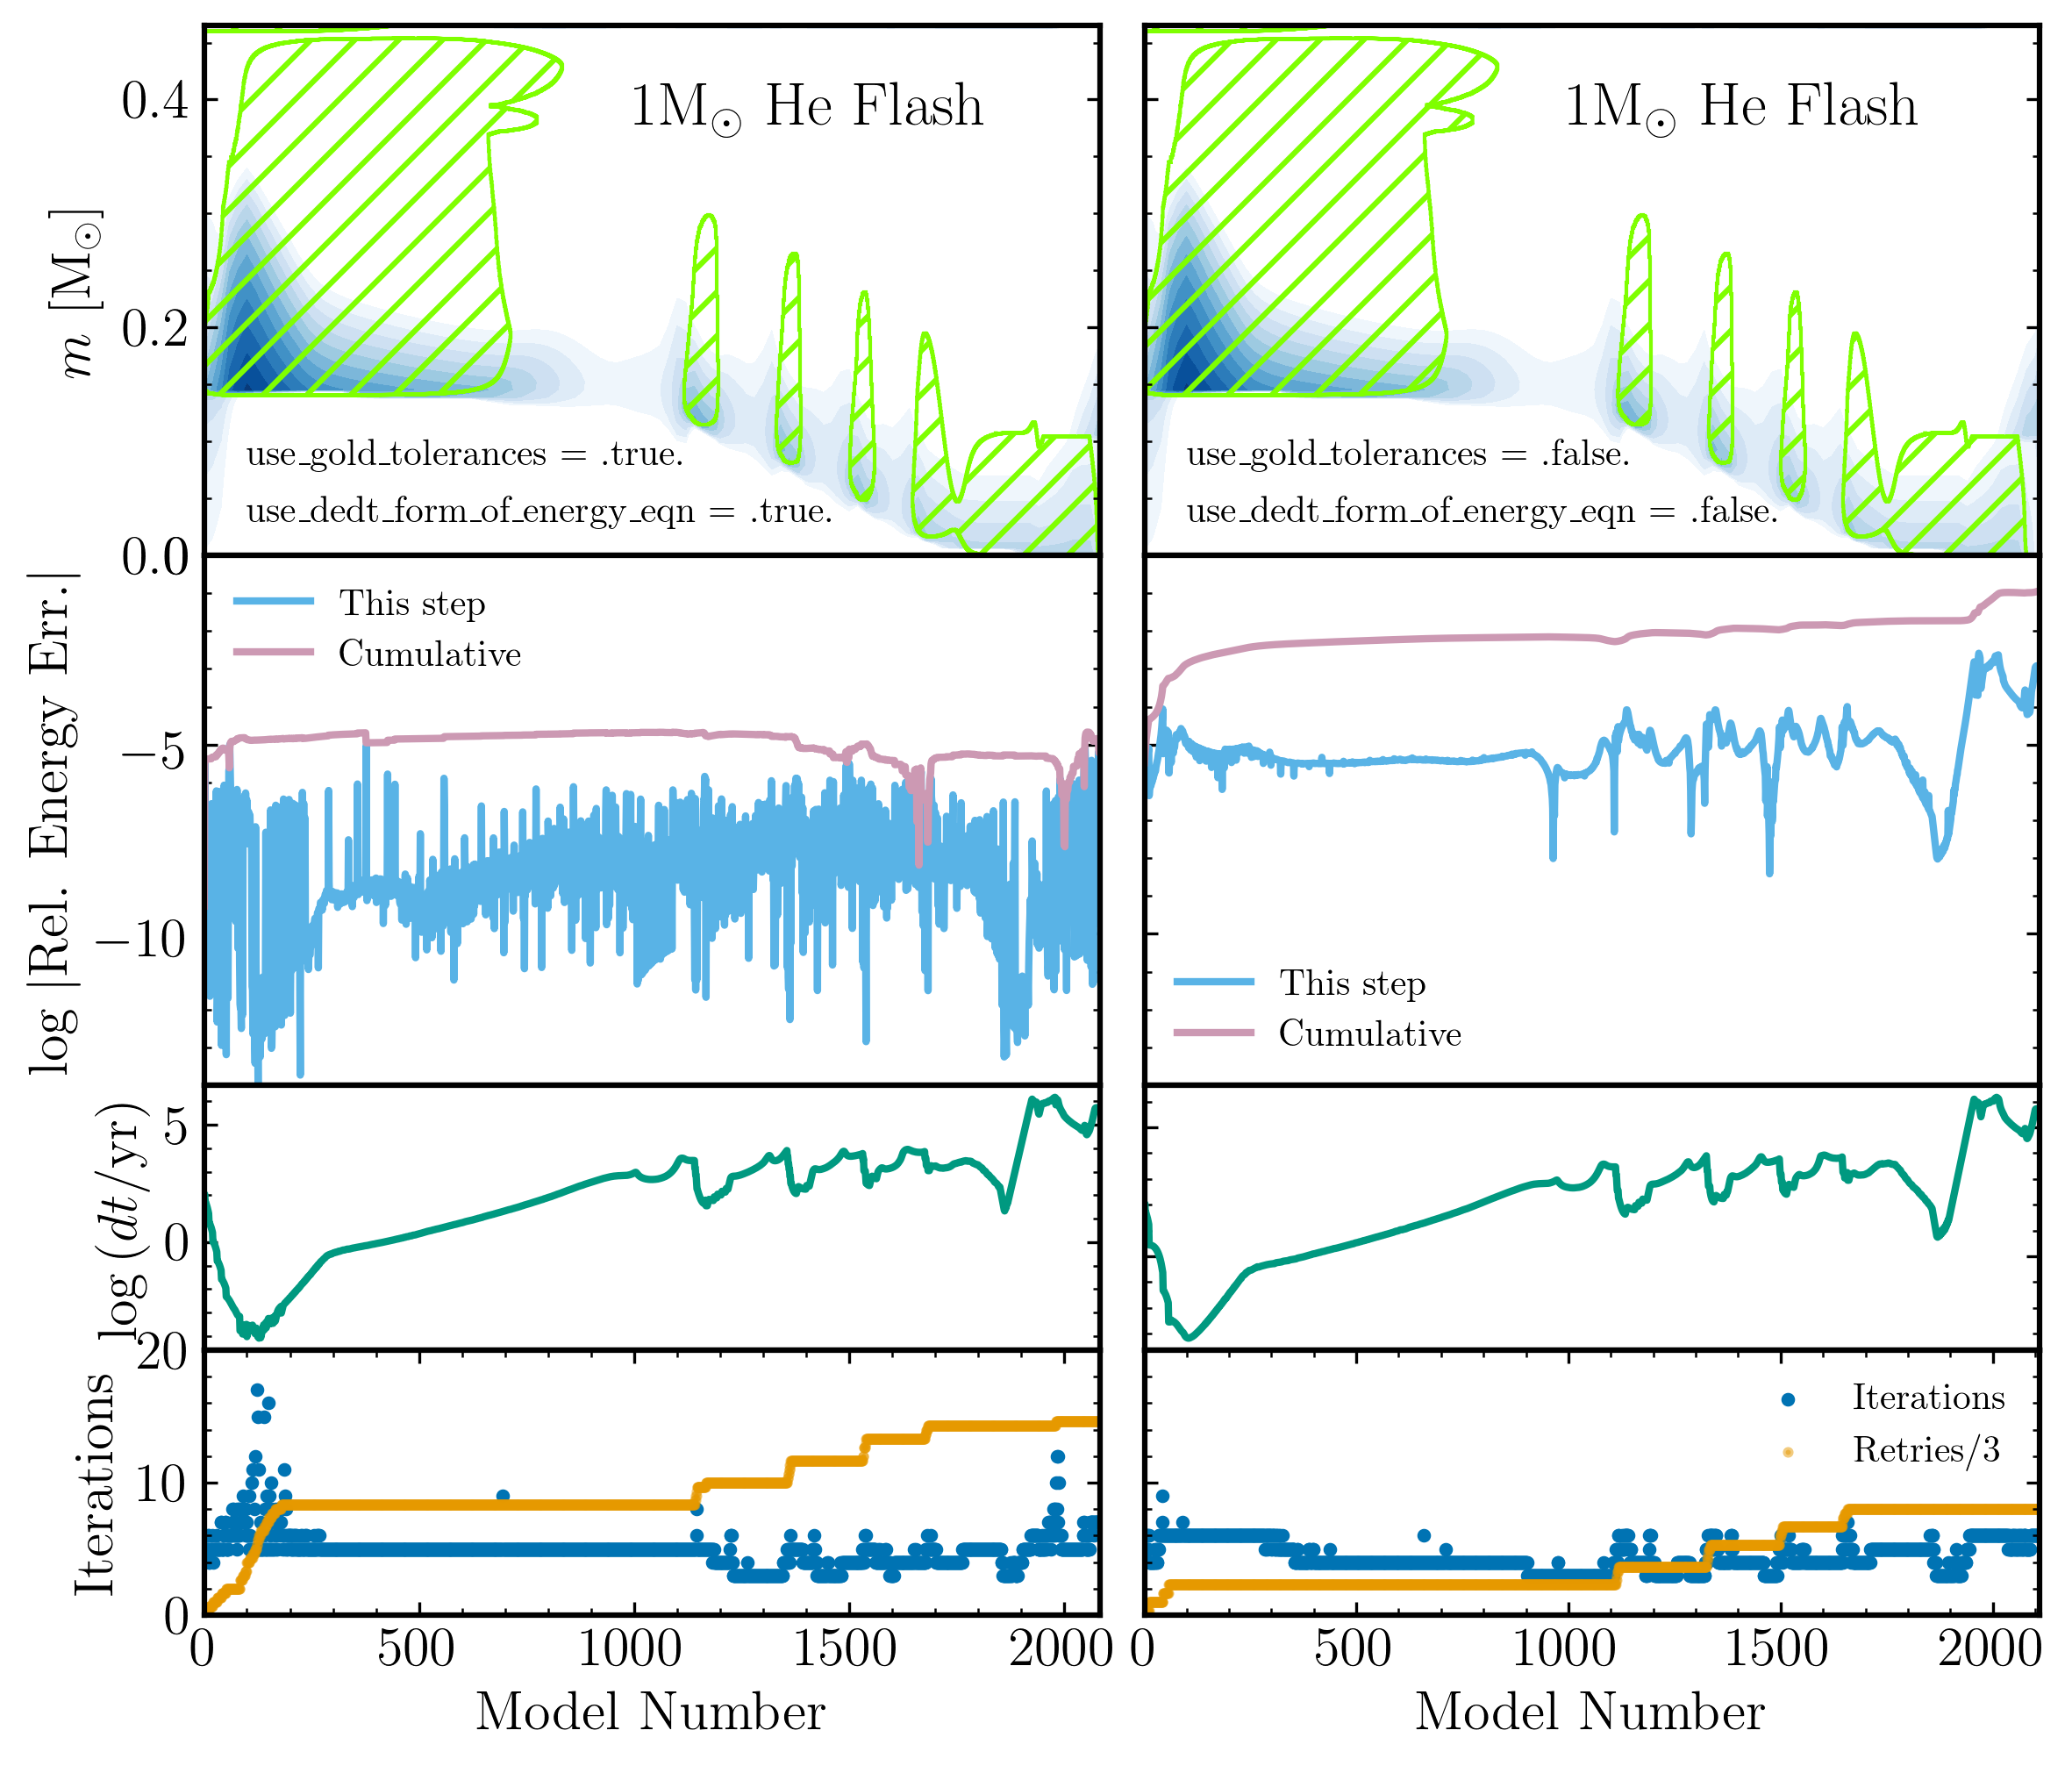

In [41]:
######### Set grid plot ####################

gs1 = gridspec.GridSpec(4, 2,height_ratios=[4,4,2,2])
gs1.update(wspace=0.05,hspace=0.00)

## Prepare axis and remove xticks from top plot

ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[1,0])
ax3 = plt.subplot(gs1[2,0])
ax4 = plt.subplot(gs1[3,0])

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])


ax1b = plt.subplot(gs1[0,1])
ax2b = plt.subplot(gs1[1,1])
ax3b = plt.subplot(gs1[2,1])
ax4b = plt.subplot(gs1[3,1])

ax1b.set_xticks([])
ax2b.set_xticks([])
ax3b.set_xticks([])


########### First Column ####################

## Data
h=mr.MesaData(dir1+'/history.data')
model = h.model_number 
log_dt = h.log_dt
log_rel_run_E_err=h.log_rel_run_E_err
rel_E_err = h.rel_E_err
num_retries=h.num_retries
num_newton_iterations = h.num_newton_iterations # num_iters (iterations at this step)

## Kippenhahan Panel
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[dir2],xaxis="model_number",yresolution=100,core_masses=[],decorate_plot = False), axis = ax1)

## Energy error Panel
ax2.plot(model,np.log10(np.abs(rel_E_err)),c=SKY_BLUE,label=r'This step')
ax2.plot(model,log_rel_run_E_err,c=RED_PURPLE,label='Cumulative')

## Timestep Panel
ax3.plot(model,log_dt,c=BLUE_GREEN)

## Iteration Numbers Panel
ax4.scatter(model,num_newton_iterations,c=BLUE,s=5,label='Iterations')
#ax4d=ax4.axtwin()
ax4.scatter(model,num_retries/3,c=ORANGE,s=2,alpha=0.5,label='Retries/3')

## Styling 
xmin=min(model)
xmax=max(model)
ax1.set_xlim(xmin,xmax)
ax2.set_xlim(xmin,xmax)
ax3.set_xlim(xmin,xmax)
ax4.set_xlim(xmin,xmax)
ax1b.yaxis.label.set_visible(False)
ax2b.yaxis.label.set_visible(False)
ax3b.yaxis.label.set_visible(False)
ax4b.yaxis.label.set_visible(False)
ax1.set_ylabel("$m$ [M$_\odot$]")
ax2.set_ylabel(r'$\log\mid$Rel. Energy Err.$\mid$')
ax3.set_ylabel(r'$\log \,  (dt/{\rm yr})$')
ax4.set_ylabel('Iterations')
ax4.set_xlabel('Model Number')
ax1.set_ylim(0,0.465)
ax2.set_ylim(-14,0)
ax4.set_ylim(0,20)
ax1.annotate('1M$_\odot$ He Flash', (1000,0.37),textcoords='data',fontsize=17)
ax1.annotate('use\_gold\_tolerances = .true.', (100,0.08),fontsize=10)
ax1.annotate('use\_dedt\_form\_of\_energy\_eqn = .true.',(100,0.03),fontsize=10)
legend = ax2.legend(loc='upper left',fontsize=10)
#legend2 = ax4.legend(loc='upper right',fontsize=10)



########### Second Column ####################
# Add total number of iterations / computational time
# Add to the caption that gold tolerances impose a larger number of iterations and
# Retries ?
## Data
h=mr.MesaData(dir2+'/history.data')
model = h.model_number 
log_dt = h.log_dt
log_rel_run_E_err=h.log_rel_run_E_err
rel_E_err = h.rel_E_err
num_retries=h.num_retries
num_newton_iterations = h.num_newton_iterations # num_iters (iterations at this step)

## Kippenhahan Panel
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[dir2],xaxis="model_number",yresolution=100,core_masses=[],decorate_plot = False), axis = ax1b)

## Energy error Panel
ax2b.plot(model,np.log10(np.abs(rel_E_err)),c=SKY_BLUE,label=r'This step')
ax2b.plot(model,log_rel_run_E_err,c=RED_PURPLE,label='Cumulative')

## Timestep Panel
ax3b.plot(model,log_dt,c=BLUE_GREEN)

## Iteration Numbers Panel
ax4b.scatter(model,num_newton_iterations,c=BLUE,s=5,label='Iterations')
#ax4c=ax4b.axtwin()
ax4b.scatter(model,num_retries/3,c=ORANGE,s=2,alpha=0.5,label='Retries/3')

## Styling 
xmin=min(model)
xmax=max(model)
ax1b.set_yticklabels([])
ax2b.set_yticklabels([])
ax3b.set_yticklabels([])
ax4b.set_yticklabels([])
ax1b.set_xlim(xmin,xmax)
ax2b.set_xlim(xmin,xmax)
ax3b.set_xlim(xmin,xmax)
ax4b.set_xlim(xmin,xmax)
ax2b.set_ylabel(r'$\log\mid$Rel. Energy Err.$\mid$')
ax3b.set_ylabel(r'$\log \,  (dt/{\rm yr})$')
ax4b.set_ylabel('Iterations')
ax4b.set_xlabel('Model Number')
ax1b.set_ylim(0,0.465)
ax1.set_ylabel("$m$ [M$_\odot$]")
ax2b.set_ylim(-14,0)
ax4b.set_ylim(0,20)
ax1b.annotate('1M$_\odot$ He Flash', (1000,0.37),textcoords='data',fontsize=17)
ax1b.annotate('use\_gold\_tolerances = .false.', (100,0.08),fontsize=10)
ax1b.annotate('use\_dedt\_form\_of\_energy\_eqn = .false.',(100,0.03),fontsize=10)
legend = ax2b.legend(loc='lower left',fontsize=10)
#legend = ax4.legend(loc='upper right',fontsize=10)
legend3 = ax4b.legend(loc='upper right',fontsize=10)



## SAVE FIGURE

plt.savefig("kipp_error_heflash_twopanels.pdf")

Reading profile data
Reading history data
Constructing mixing regions


/Users/mcantiello/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


there are 20 mixing zones
Reading profile data
Reading history data
Constructing mixing regions


/Users/mcantiello/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
/Users/mcantiello/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


there are 20 mixing zones


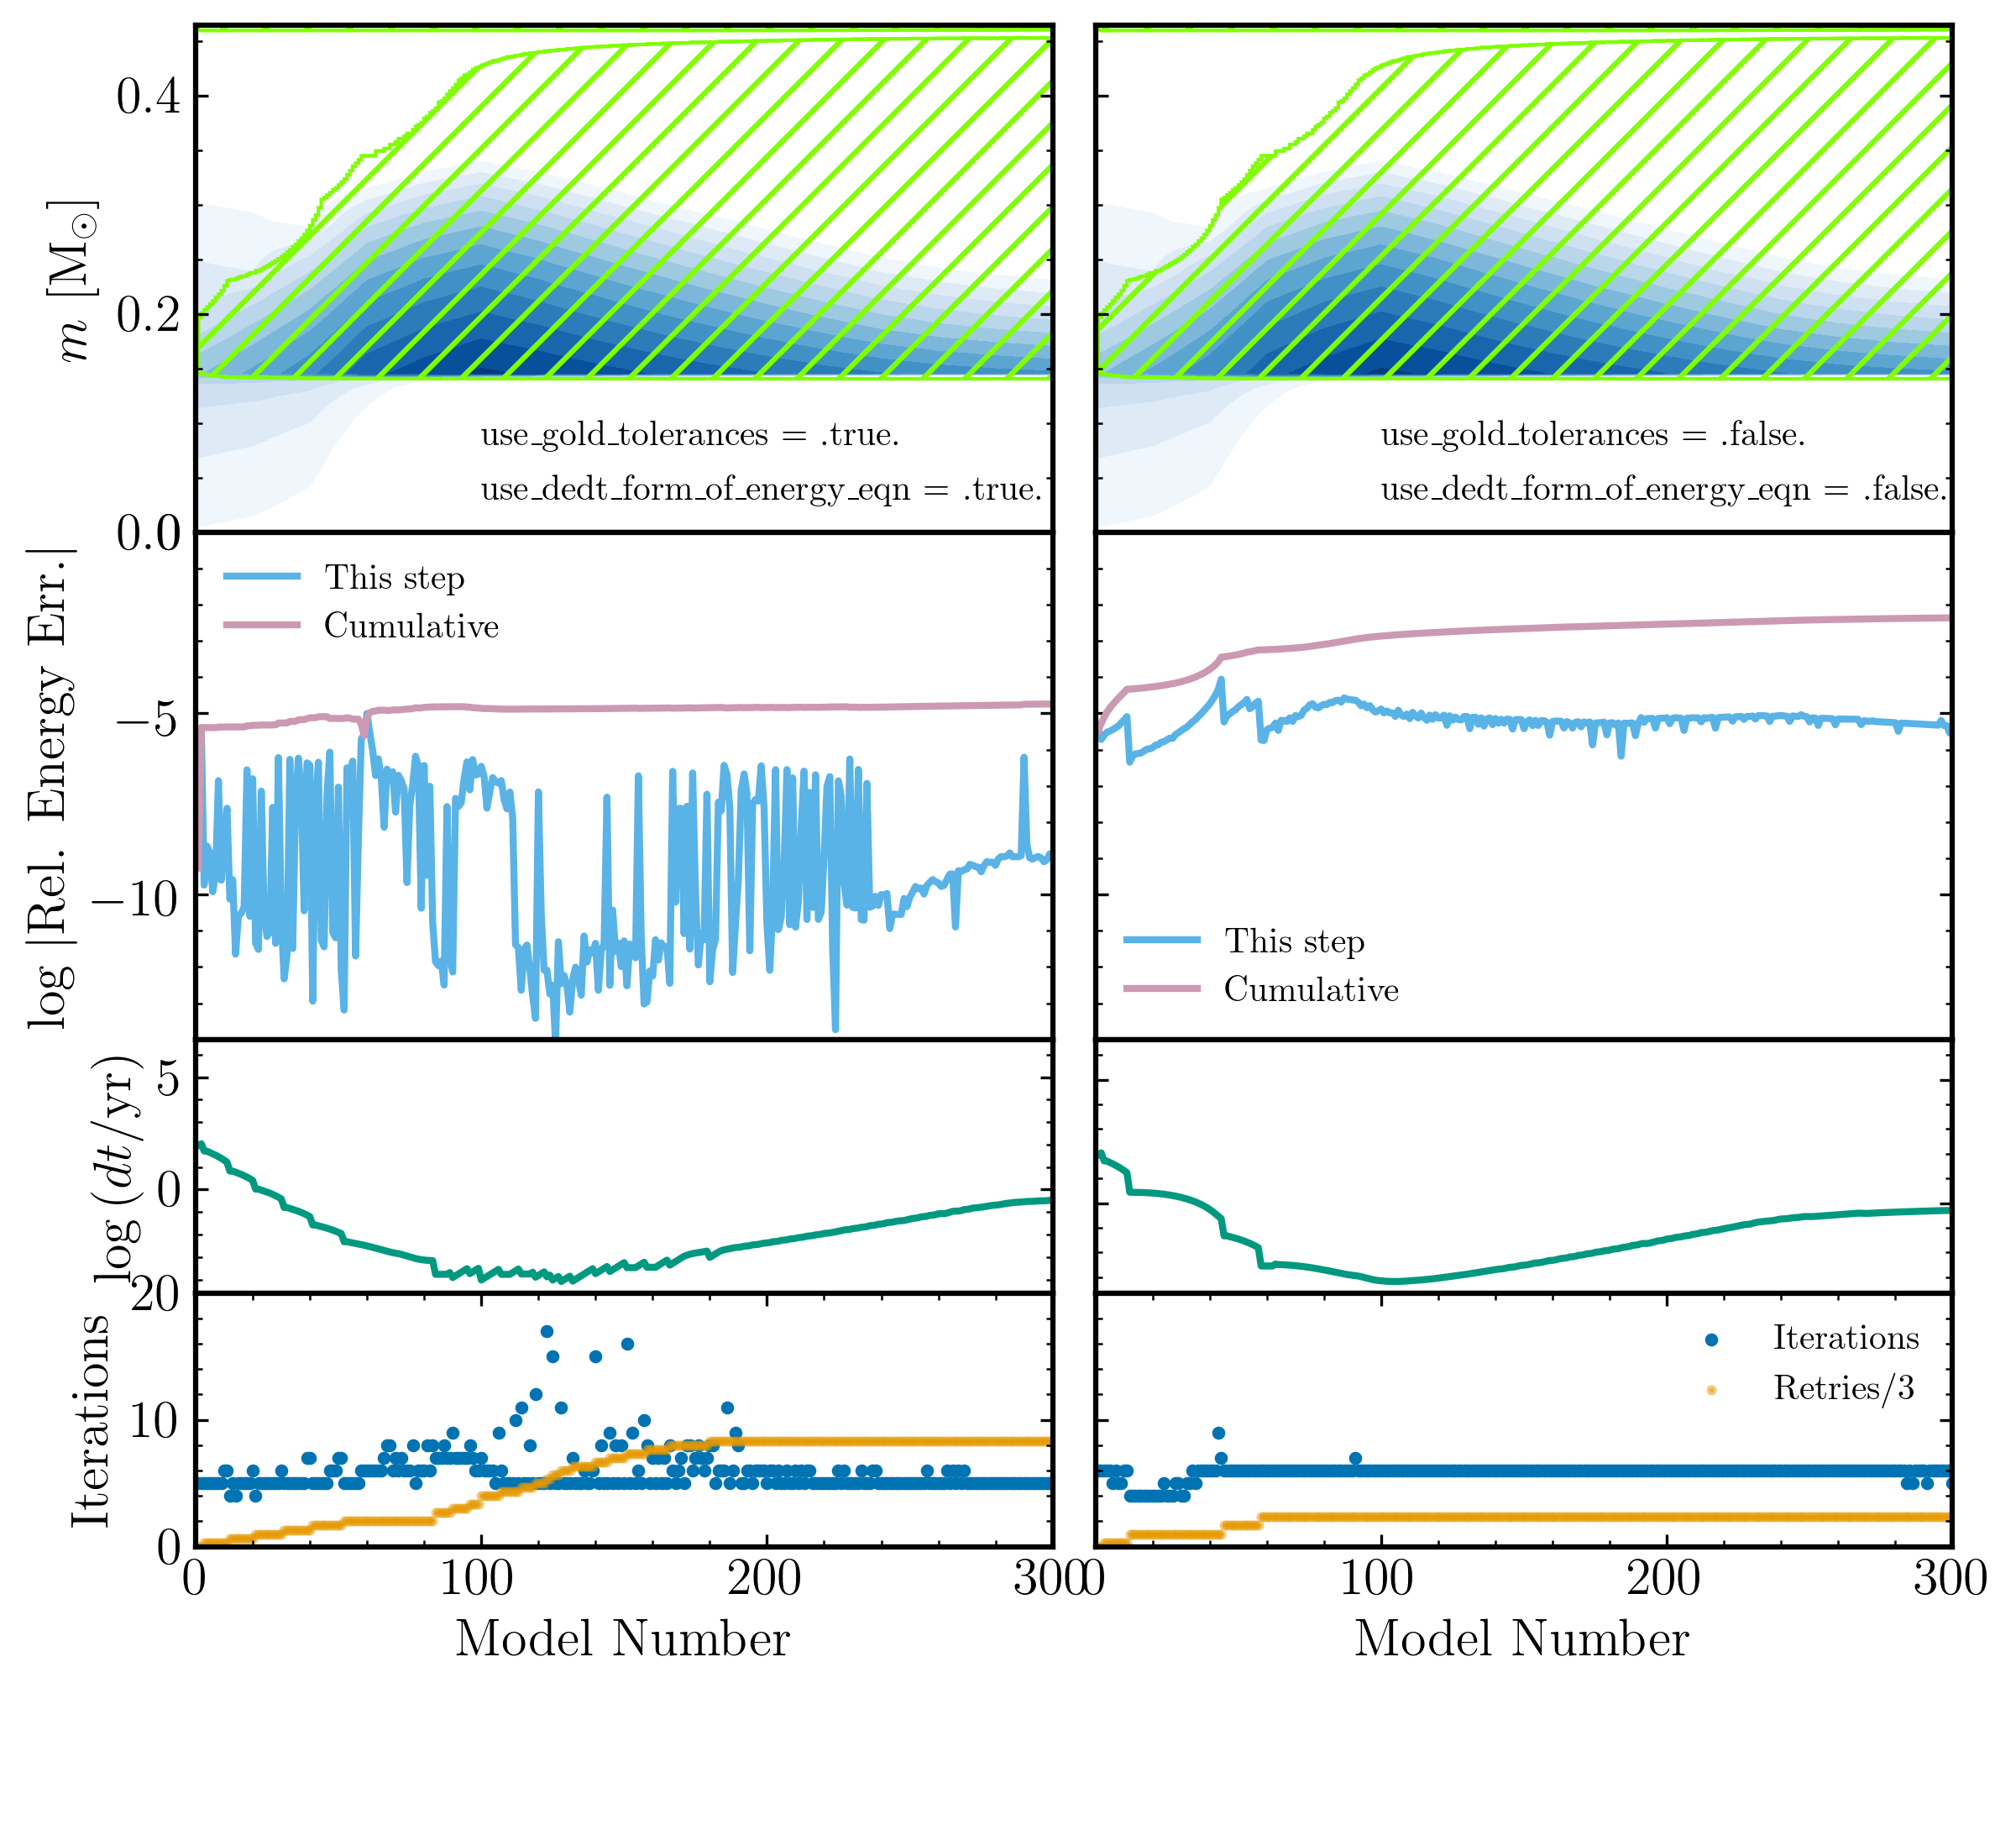

In [42]:
######### Set grid plot ####################

gs1 = gridspec.GridSpec(4, 2,height_ratios=[4,4,2,2])
gs1.update(wspace=0.05,hspace=0.00)

## Prepare axis and remove xticks from top plot

ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[1,0])
ax3 = plt.subplot(gs1[2,0])
ax4 = plt.subplot(gs1[3,0])

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])


ax1b = plt.subplot(gs1[0,1])
ax2b = plt.subplot(gs1[1,1])
ax3b = plt.subplot(gs1[2,1])
ax4b = plt.subplot(gs1[3,1])

ax1b.set_xticks([])
ax2b.set_xticks([])
ax3b.set_xticks([])


########### First Column ####################

## Data
h=mr.MesaData(dir1+'/history.data')
model = h.model_number 
log_dt = h.log_dt
log_rel_run_E_err=h.log_rel_run_E_err
rel_E_err = h.rel_E_err
num_retries=h.num_retries
num_newton_iterations = h.num_newton_iterations # num_iters (iterations at this step)

## Kippenhahan Panel
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[dir2],xaxis="model_number",yresolution=100,core_masses=[],decorate_plot = False), axis = ax1)

## Energy error Panel
ax2.plot(model,np.log10(np.abs(rel_E_err)),c=SKY_BLUE,label=r'This step')
ax2.plot(model,log_rel_run_E_err,c=RED_PURPLE,label='Cumulative')

## Timestep Panel
ax3.plot(model,log_dt,c=BLUE_GREEN)

## Iteration Numbers Panel
ax4.scatter(model,num_newton_iterations,c=BLUE,s=5,label='Iterations')
#ax4d=ax4.axtwin()
ax4.scatter(model,num_retries/3,c=ORANGE,s=2,alpha=0.5,label='Retries/3')

## Styling 
xmin=0
xmax=300
ax1.set_xlim(xmin,xmax)
ax2.set_xlim(xmin,xmax)
ax3.set_xlim(xmin,xmax)
ax4.set_xlim(xmin,xmax)
ax1b.yaxis.label.set_visible(False)
ax2b.yaxis.label.set_visible(False)
ax3b.yaxis.label.set_visible(False)
ax4b.yaxis.label.set_visible(False)
ax1.set_ylabel("$m$ [M$_\odot$]")
ax2.set_ylabel(r'$\log\mid$Rel. Energy Err.$\mid$')
ax3.set_ylabel(r'$\log \,  (dt/{\rm yr})$')
ax4.set_ylabel('Iterations')
ax4.set_xlabel('Model Number')
ax1.set_ylim(0,0.465)
ax2.set_ylim(-14,0)
ax4.set_ylim(0,20)
ax1.annotate('1M$_\odot$ He Flash', (1000,0.37),textcoords='data',fontsize=17)
ax1.annotate('use\_gold\_tolerances = .true.', (100,0.08),fontsize=10)
ax1.annotate('use\_dedt\_form\_of\_energy\_eqn = .true.',(100,0.03),fontsize=10)
legend = ax2.legend(loc='upper left',fontsize=10)
#legend2 = ax4.legend(loc='upper right',fontsize=10)



########### Second Column ####################
# Add total number of iterations / computational time
# Add to the caption that gold tolerances impose a larger number of iterations and
# Retries ?
## Data
h=mr.MesaData(dir2+'/history.data')
model = h.model_number 
log_dt = h.log_dt
log_rel_run_E_err=h.log_rel_run_E_err
rel_E_err = h.rel_E_err
num_retries=h.num_retries
num_newton_iterations = h.num_newton_iterations # num_iters (iterations at this step)

## Kippenhahan Panel
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[dir2],xaxis="model_number",yresolution=100,core_masses=[],decorate_plot = False), axis = ax1b)

## Energy error Panel
ax2b.plot(model,np.log10(np.abs(rel_E_err)),c=SKY_BLUE,label=r'This step')
ax2b.plot(model,log_rel_run_E_err,c=RED_PURPLE,label='Cumulative')

## Timestep Panel
ax3b.plot(model,log_dt,c=BLUE_GREEN)

## Iteration Numbers Panel
ax4b.scatter(model,num_newton_iterations,c=BLUE,s=5,label='Iterations')
#ax4c=ax4b.axtwin()
ax4b.scatter(model,num_retries/3,c=ORANGE,s=2,alpha=0.5,label='Retries/3')

## Styling 
ax1b.set_yticklabels([])
ax2b.set_yticklabels([])
ax3b.set_yticklabels([])
ax4b.set_yticklabels([])
ax1b.set_xlim(xmin,xmax)
ax2b.set_xlim(xmin,xmax)
ax3b.set_xlim(xmin,xmax)
ax4b.set_xlim(xmin,xmax)
ax2b.set_ylabel(r'$\log\mid$Rel. Energy Err.$\mid$')
ax3b.set_ylabel(r'$\log \,  (dt/{\rm yr})$')
ax4b.set_ylabel('Iterations')
ax4b.set_xlabel('Model Number')
ax1b.set_ylim(0,0.465)
ax1.set_ylabel("$m$ [M$_\odot$]")
ax2b.set_ylim(-14,0)
ax4b.set_ylim(0,20)
ax1b.annotate('1M$_\odot$ He Flash', (1000,0.37),textcoords='data',fontsize=17)
ax1b.annotate('use\_gold\_tolerances = .false.', (100,0.08),fontsize=10)
ax1b.annotate('use\_dedt\_form\_of\_energy\_eqn = .false.',(100,0.03),fontsize=10)
legend = ax2b.legend(loc='lower left',fontsize=10)
#legend = ax4.legend(loc='upper right',fontsize=10)
legend3 = ax4b.legend(loc='upper right',fontsize=10)



## SAVE FIGURE

plt.savefig("kipp_error_heflash_twopanels.pdf")